# Setup & Data Import

## Setup Global Configs and Import Libraries

In [1]:
# SETUP & IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
from scipy import stats
import itertools
import re
import missingno as msno

# Display options for clarity
pd.set_option('display.width', 160)
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda v: f"{v:,.4f}")

# Set visual themes
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.05)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
# --- Define Paths ---
salary_path = Path('Salary_Data.csv')
survey_path = Path('survey_respondents_info.csv')

# --- Validate File Existence ---
for path in [salary_path, survey_path]:
    if not path.exists():
        raise FileNotFoundError(f"❌ File not found: {path.resolve()}")

# --- Load with Delimiter Fallback ---
def load_csv_safely(path):
    try:
        return pd.read_csv(path, sep=',', engine='python')
    except Exception:
        print(f"⚠️ Failed with ',' — retrying with ';' for {path.name}...")
        return pd.read_csv(path, sep=';', engine='python')

# --- Load Both Datasets ---
salary_df = load_csv_safely(salary_path)
survey_df = load_csv_safely(survey_path)

print(f"✅ Salary_Data loaded: {salary_df.shape[0]:,} rows × {salary_df.shape[1]} columns")
print(salary_df.info())
display(salary_df.head())

print(f"✅ Survey_Respondents_Info loaded: {survey_df.shape[0]:,} rows × {survey_df.shape[1]} columns")
print(survey_df.info())
display(survey_df.head())

⚠️ Failed with ',' — retrying with ';' for survey_respondents_info.csv...
✅ Salary_Data loaded: 6,704 rows × 6 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0000,Male,Bachelor's,Software Engineer,5.0000,"90,000.0000"
1,28.0000,Female,Master's,Data Analyst,3.0000,"65,000.0000"
2,45.0000,Male,PhD,Senior Manager,15.0000,"150,000.0000"
3,36.0000,Female,Bachelor's,Sales Associate,7.0000,"60,000.0000"
4,52.0000,Male,Master's,Director,20.0000,"200,000.0000"


✅ Survey_Respondents_Info loaded: 11,761 rows × 20 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11761 entries, 0 to 11760
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11761 non-null  int64  
 1   City              11761 non-null  object 
 2   Group_size        11746 non-null  float64
 3   Age               11752 non-null  float64
 4   MPI#Mean          8044 non-null   float64
 5   TOM               11761 non-null  object 
 6   BUMO              11761 non-null  object 
 7   BUMO_Previous     6096 non-null   object 
 8   MostFavourite     11761 non-null  object 
 9   Gender            11761 non-null  object 
 10  MPI#detail        8076 non-null   object 
 11  Age#group         11752 non-null  object 
 12  Age#Group#2       11752 non-null  object 
 13  MPI               8044 non-null   object 
 14  MPI#2             8044 non-null   object 
 15  Occupation        11761 non-

,ID,City,Group_size,Age,MPI#Mean,TOM,BUMO,BUMO_Previous,MostFavourite,Gender,MPI#detail,Age#group,Age#Group#2,MPI,MPI#2,Occupation,Occupation#group,Year,Col,MPI_Mean_Use
0,348226,Cần Thơ,3.0000,29.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
1,358485,Hà Nội,3.0000,25.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
2,360729,Cần Thơ,3.0000,25.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Female,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Unskilled Labor (worker, landry person, driver...",Blue Collar,2018,3,"5,499.0000"
3,360737,Cần Thơ,3.0000,24.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,20 - 24 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Skilled Labor (tailor, machinist, carpenter, e...",Blue Collar,2018,3,"5,499.0000"
4,361753,Cần Thơ,3.0000,26.0000,"5,499.0000",Other 1,Other 1,NaN,Other 1,Male,From 4.5 millions to 6.49 millions VND,20 - 29,25 - 29 y.o.,VND 4.5m - VND 8.9m,2.VND 4.5m - VND 8.9m,"Semi-skilled labor (salesperson, waiter, photo...",Blue Collar,2018,3,"5,499.0000"


## Define Necessary Functions

In [3]:
# Function to split CamelCase while keeping acronyms intact
def split_camel_case_keep_acronyms(name):
    """
    Convert CamelCase to Snake_Case while keeping acronyms intact.
    
    Examples:
    - 'MostFavourite' -> 'Most_Favourite'
    - 'CustomerMPIValue' -> 'Customer_MPI_Value'
    - 'NPSScore' -> 'NPS_Score'
    """
    # Insert underscore between:
    #   1. a lowercase letter and uppercase letter (e.g., tM -> t_M)
    #   2. but NOT between consecutive uppercase letters (e.g., MPI stays MPI)
    return re.sub(r'(?<=[a-z])(?=[A-Z])', '_', name)

In [4]:
# Create a function to check ID uniqueness
def check_id_uniqueness(df, id_column='id'):
    """
    Check if the specified ID column in a DataFrame contains unique values.
    Prints duplicate IDs and their counts if any are found.
    """

    """
    Steps:
    1. Count frequency of each ID.
    2. If all frequencies are 1, IDs are unique.
    3. If any frequency > 1, there are duplicate IDs.
    4. Print duplicate IDs with their counts.
    """
    # Check if the ID column exists
    if id_column not in df.columns:
        print(f"❌ Column '{id_column}' not found in DataFrame, try a correct column name.")
        return

    # Step 1: Count frequency of each ID
    id_counts = df[id_column].value_counts()

    # Step 2: Check if all IDs are unique
    if (id_counts == 1).all():
        print("✅ All IDs are unique.")
    else:
        print("❌ Duplicate IDs found!")

        # Step 3: Filter IDs where frequency > 1
        duplicates = id_counts[id_counts > 1]

        # Step 4: Print duplicate IDs and their counts
        print("\nDuplicated IDs and their counts:")
        print(duplicates)

## Change Columns Formatting

In [5]:
# Check column names
dfs = [
    salary_df,
    survey_df
]

for df in dfs:
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI#Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI#detail', 'Age#group', 'Age#Group#2', 'MPI', 'MPI#2', 'Occupation', 'Occupation#group', 'Year', 'Col', 'MPI_Mean_Use']


In [6]:
# Replace # with _ in column names
for df in dfs:
    df.columns = df.columns.str.replace('#', '_', regex=False)
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'MostFavourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']


In [7]:
# Split CamelCase while preserving acronyms
for df in dfs:
    df.columns = [split_camel_case_keep_acronyms(col) for col in df.columns]
    print(list(df.columns))

['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'Most_Favourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']


In [8]:
# Replace ' ' with _ in column names
for df in dfs:
    df.columns = df.columns.str.replace(' ', '_', regex=False)
    print(list(df.columns))

['Age', 'Gender', 'Education_Level', 'Job_Title', 'Years_of_Experience', 'Salary']
['ID', 'City', 'Group_size', 'Age', 'MPI_Mean', 'TOM', 'BUMO', 'BUMO_Previous', 'Most_Favourite', 'Gender', 'MPI_detail', 'Age_group', 'Age_Group_2', 'MPI', 'MPI_2', 'Occupation', 'Occupation_group', 'Year', 'Col', 'MPI_Mean_Use']


In [9]:
# Convert all column names to lowercase
for df in dfs:
    df.columns = df.columns.str.lower()
    print(list(df.columns))

['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary']
['id', 'city', 'group_size', 'age', 'mpi_mean', 'tom', 'bumo', 'bumo_previous', 'most_favourite', 'gender', 'mpi_detail', 'age_group', 'age_group_2', 'mpi', 'mpi_2', 'occupation', 'occupation_group', 'year', 'col', 'mpi_mean_use']


In [10]:
# Check column names after formatting
for df in dfs:
    print(list(df.columns))

['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary']
['id', 'city', 'group_size', 'age', 'mpi_mean', 'tom', 'bumo', 'bumo_previous', 'most_favourite', 'gender', 'mpi_detail', 'age_group', 'age_group_2', 'mpi', 'mpi_2', 'occupation', 'occupation_group', 'year', 'col', 'mpi_mean_use']


# Dataframe 1

## Select Dataset and Handle Grammar Errors

In [11]:
# Select dataset to analyze
current_df = salary_df.copy()

In [12]:
# Print column names
print("Data columns:", list(current_df.columns))

Data columns: ['age', 'gender', 'education_level', 'job_title', 'years_of_experience', 'salary']


In [13]:
# Check unique values to identity grammar and data issues
for column_name in current_df.columns:
    print(f"Unique values in column '{column_name}':")
    print(current_df[column_name].unique())
    print("\n")

Unique values in column 'age':
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. nan 61. 57. 62. 55.
 56. 54. 60. 58. 22. 21.]


Unique values in column 'gender':
['Male' 'Female' nan 'Other']


Unique values in column 'education_level':
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


Unique values in column 'job_title':
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product

In [14]:
# Fix grammar issues manually if any
replacement_dict = {}           # Add replacements as needed
target_col = []                 # Only apply one column at a time

# Dictionary is not blank, so apply replacements
if len(replacement_dict) == 0 or len(target_col) == 0:
    print("ℹ️ replacement_dict and target_col are empty — no replacements applied.")
else:
    for col in target_col:
        if col in current_df.columns:
            current_df[col] = current_df[col].replace(replacement_dict)
            print("✅ Replacements applied successfully to column:", col)
            print(f"Unique values in '{col}' after replacements:", current_df[col].unique())

ℹ️ replacement_dict and target_col are empty — no replacements applied.


## Define Columns

In [15]:
# Define columns
categorical_cols = ['gender', 'education_level', 'job_title'] # Change respectively to your dataset
numerical_cols = ['age', 'years_of_experience', 'salary']   # Change respectively to your dataset
data_cols = current_df.columns.to_list()

# Validate presence of expected columns
missing_expected = [c for c in categorical_cols + numerical_cols if c not in current_df.columns]
if missing_expected:
    print("⚠️ Warning: These expected columns are missing in the dataset:", missing_expected)

# Coerce categorical columns
for col in categorical_cols:
    if col in current_df.columns:
        current_df[col] = current_df[col].astype('category')

# Attempt to convert numerical columns robustly
for col in numerical_cols:
    if col in current_df.columns:
        # Strip common formatting issues then coerce
        current_df[col] = (current_df[col]
                   .astype(str)
                   .str.replace('$', '', regex=False)
                   .str.strip())
        current_df[col] = pd.to_numeric(current_df[col], errors='coerce')

print("\nDataFrame info():")
print(current_df.info())

display(current_df.head())


DataFrame info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  6702 non-null   float64 
 1   gender               6702 non-null   category
 2   education_level      6701 non-null   category
 3   job_title            6702 non-null   category
 4   years_of_experience  6701 non-null   float64 
 5   salary               6699 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 189.5 KB
None


,age,gender,education_level,job_title,years_of_experience,salary
0,32.0000,Male,Bachelor's,Software Engineer,5.0000,"90,000.0000"
1,28.0000,Female,Master's,Data Analyst,3.0000,"65,000.0000"
2,45.0000,Male,PhD,Senior Manager,15.0000,"150,000.0000"
3,36.0000,Female,Bachelor's,Sales Associate,7.0000,"60,000.0000"
4,52.0000,Male,Master's,Director,20.0000,"200,000.0000"


## Data Quality Assessment

In [16]:
# Check uniqueness of 'id' column 
check_id_uniqueness(current_df, id_column='id')

❌ Column 'id' not found in DataFrame, try a correct column name.


In [17]:
# Descriptive statistics (numeric)
print("\nDescriptive statistics (numeric):")
display(current_df.describe().round(2))

# Check duplicate rows
duplicate_rows = int(current_df.duplicated().sum())
print(f"Duplicate rows: {duplicate_rows:,}")


Descriptive statistics (numeric):


,age,years_of_experience,salary
count,"6,702.0000","6,701.0000","6,699.0000"
mean,33.6200,8.0900,"115,326.9600"
std,7.6100,6.0600,"52,786.1800"
min,21.0000,0.0000,350.0000
25%,28.0000,3.0000,"70,000.0000"
50%,32.0000,7.0000,"115,000.0000"
75%,38.0000,12.0000,"160,000.0000"
max,62.0000,34.0000,"250,000.0000"


Duplicate rows: 4,912


Summary Table of Missing Values:


,Number of Missing,Percentage of Missing
Column,,
salary,5,0.0700
education_level,3,0.0400
years_of_experience,3,0.0400
age,2,0.0300
gender,2,0.0300
job_title,2,0.0300


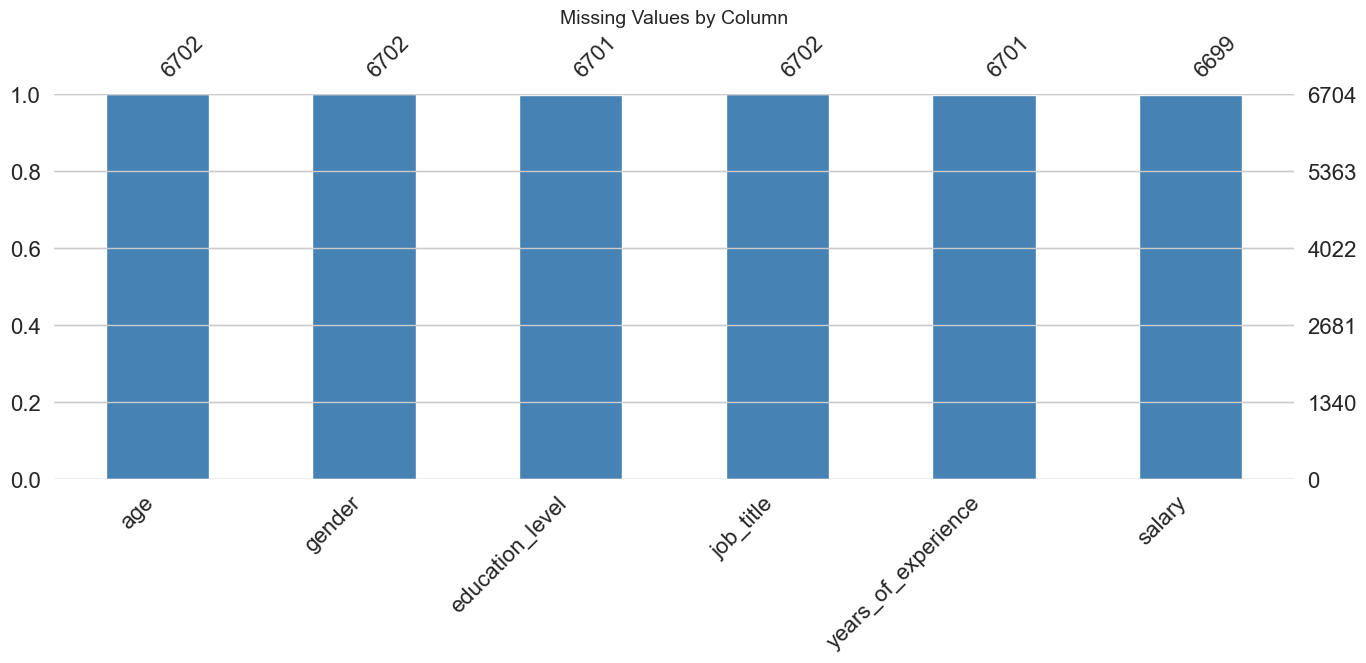

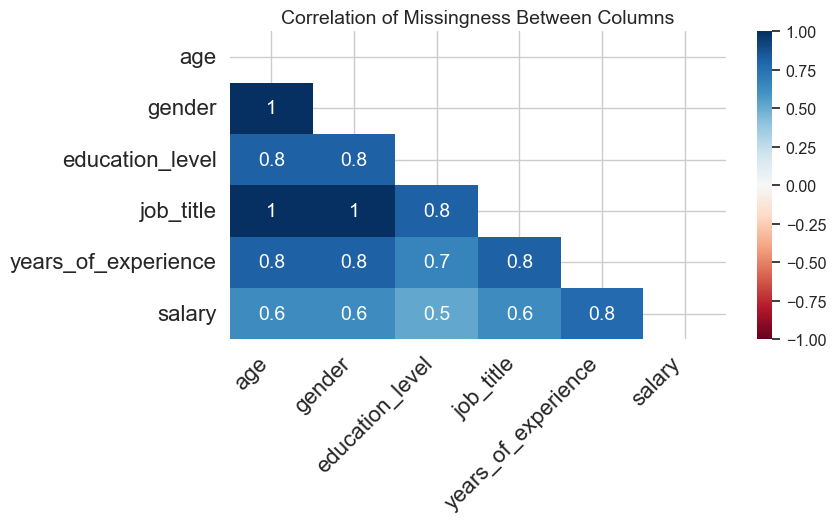

In [18]:
# Missingness summary
miss_summary = (
    current_df.isna()
    .sum()
    .rename("Number of Missing")
    .to_frame()
)
miss_summary["Percentage of Missing"] = (miss_summary["Number of Missing"] / len(current_df) * 100).round(2)
miss_summary = miss_summary.rename_axis("Column")
print("Summary Table of Missing Values:")
display(miss_summary.sort_values("Number of Missing", ascending=False))

# Summarize missing count
msno.bar(current_df, figsize=(16, 5), color='steelblue')
plt.title("Missing Values by Column")
plt.show()

# Find missing pattern
msno.heatmap(current_df, figsize=(8, 4))
plt.title("Correlation of Missingness Between Columns")
plt.show()

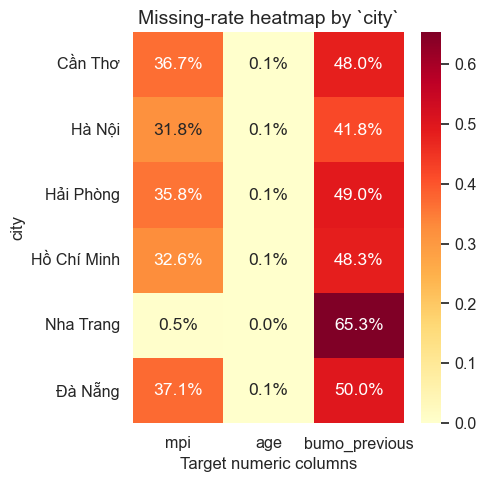

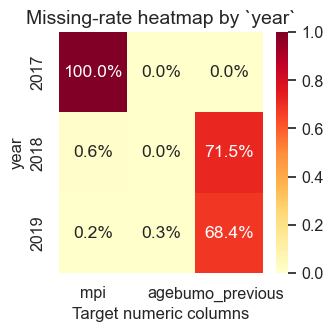

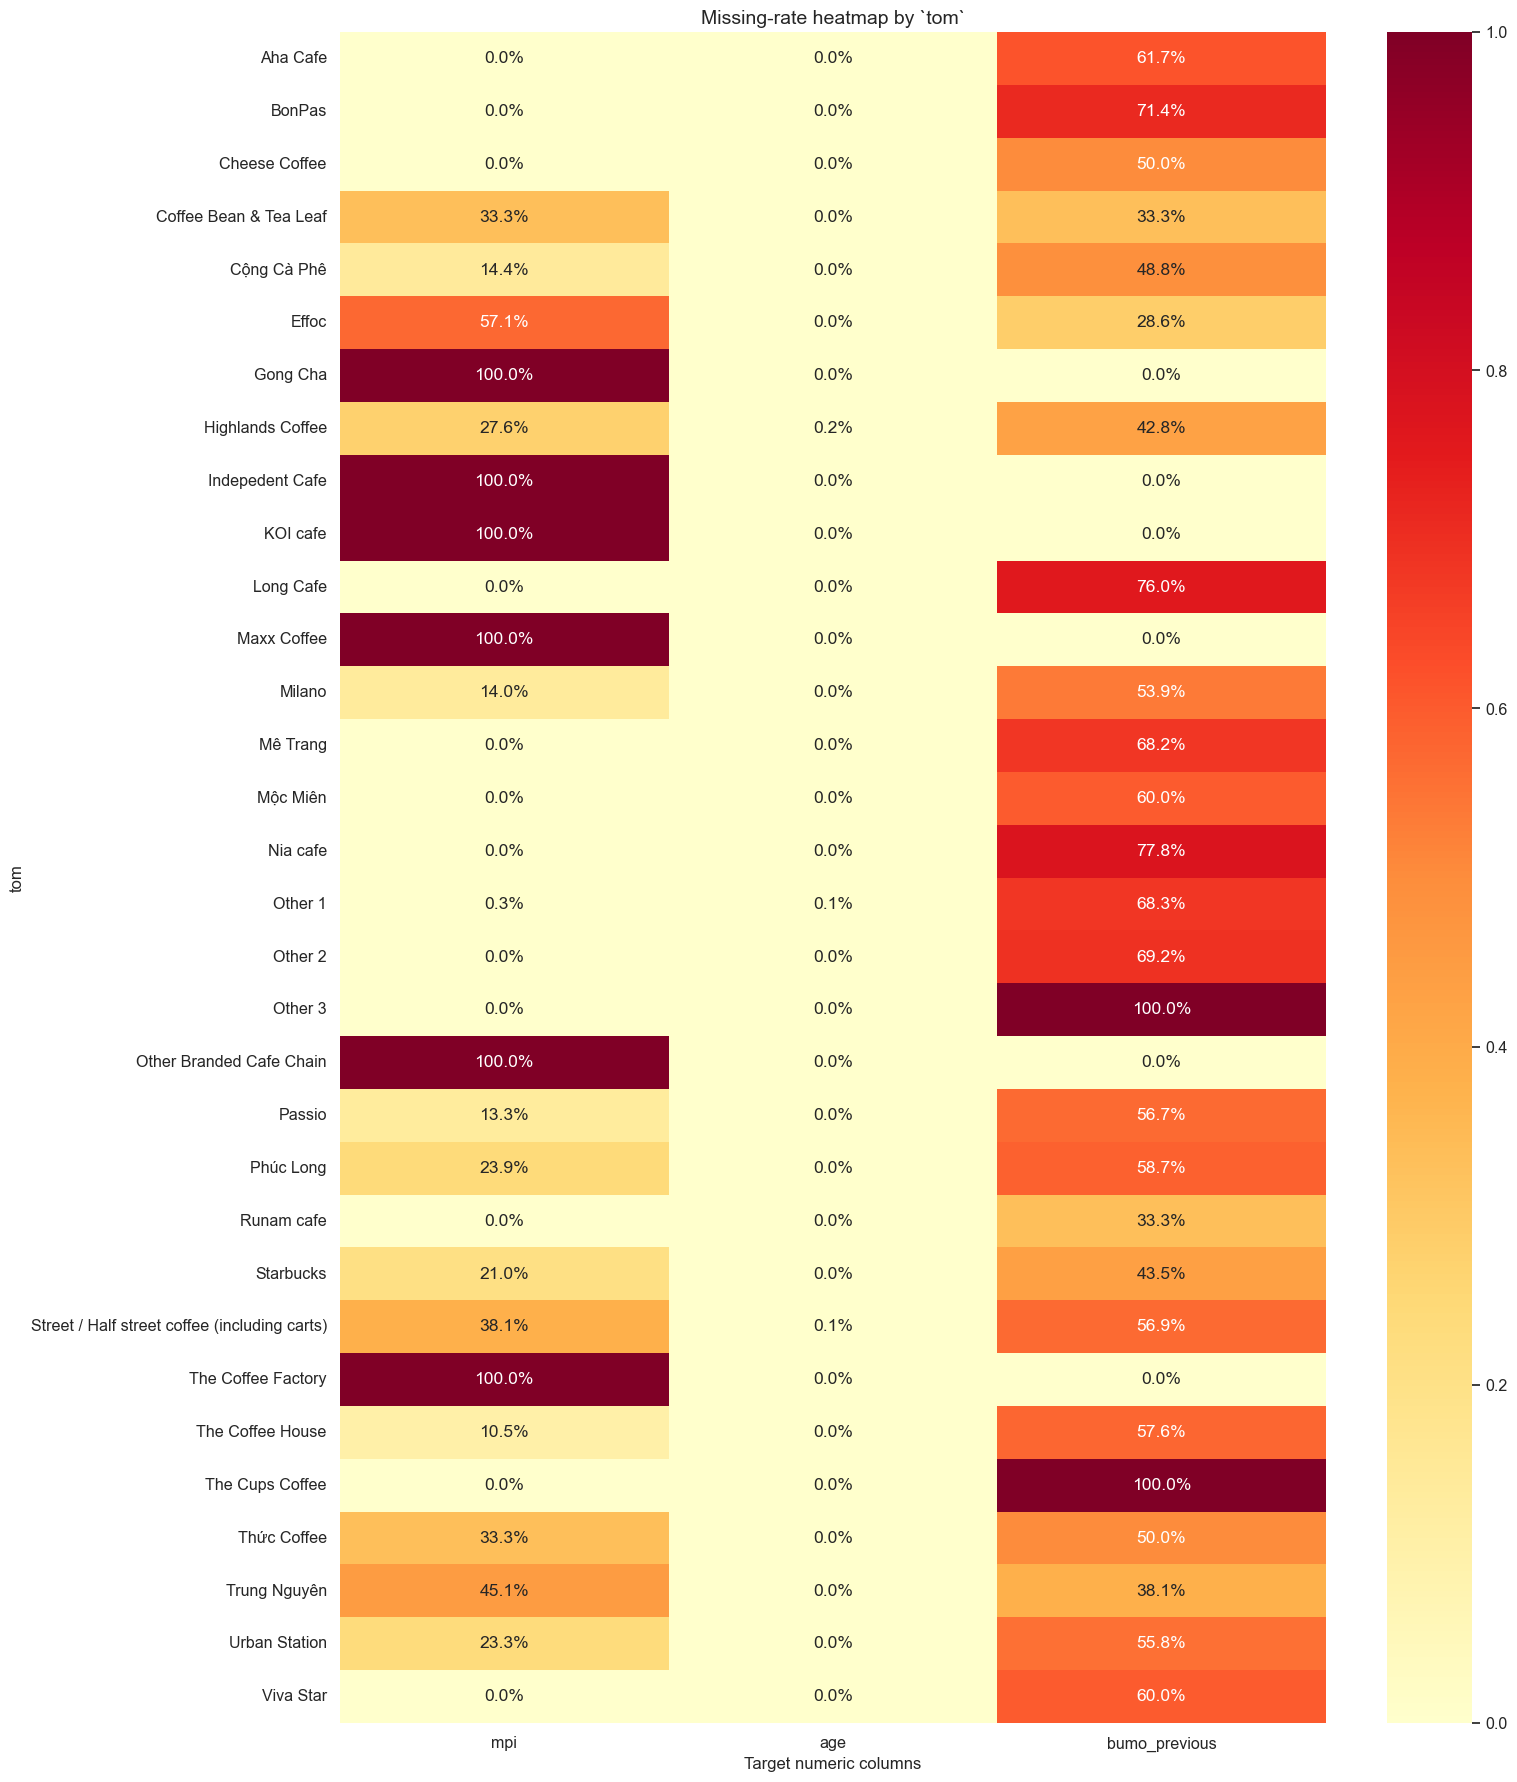

In [19]:
# Find missing pattern
target_col = ['mpi', 'age', 'bumo_previous']
group_col = ['city', 'year', 'tom']
for col in group_col:
    na_rate = survey_df.groupby(col)[target_col].apply(lambda x: x.isna().mean())
    #print("\n")
    #print(na_rate)

    plt.figure(figsize=(min(16, 2 + 0.5*na_rate.shape[0]), 0.5*na_rate.shape[0] + 2))
    sns.heatmap(na_rate, annot=True, fmt=".1%", cmap="YlOrRd", cbar=True)
    plt.title(f"Missing-rate heatmap by `{col}`")
    plt.xlabel("Target numeric columns")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Handle Missing Columns

In [20]:
# Median imputation for numerical columns by group
target_col = []             # Apply one column at a time
group_col = []              # Grouping columns to calculate median
imputation_method = 'mean'  # Options: 'mode', 'mean', 'median'

if len(target_col) == 0 or len(group_col) == 0:
    print("ℹ️ target_col and group_col are empty — no replacements applied.")
else:
    for col in target_col:
        if col not in current_df.columns:
            print(f"❌ Column '{col}' not found — skipping.")
        else:
            # Select imputation method
            if imputation_method == 'mode':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)
            elif imputation_method == 'mean':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform('mean')
            elif imputation_method == 'median':
                imputed_series = current_df.groupby(group_col, dropna=True, observed=True)[col].transform('median')
            else:
                print("⚠️ Invalid imputation_method. Choose from 'mode', 'mean', or 'median'.")
                break

            # --- Create new imputed column ---
            out_col = f"{col}_imputed"
            current_df[out_col] = current_df[col].fillna(imputed_series)

            # --- Report results ---
            before = int(current_df[col].isna().sum())
            after  = int(current_df[out_col].isna().sum())
            print(f"✅ '{col}' imputed using {imputation_method} per group ({', '.join(group_col)}).")
            print(f"   Missing before: {before}, after: {after}")
                

ℹ️ target_col and group_col are empty — no replacements applied.


In [21]:
# Overwrite original column with imputed values if needed
for col in target_col:
    out_col = f"{col}_imputed"
    if out_col in current_df.columns:
        current_df[col] = current_df[out_col]
        current_df.drop(columns=[out_col], inplace=True)
        print(f"✅ Overwrote '{col}' with imputed values and dropped '{out_col}'.")

## Outlier Detection
This cell analyzes `current_df` (DataFrame 1) for:
- Structural quality: duplicates, constant/near-constant columns, inconsistent types.
- Missingness profile (counts, percentages, patterns).
- Outlier detection using both IQR (1.5*IQR) and Z-score (|z| > 3) methods.
- Visual diagnostics: boxplots + pairwise scatter vs target-like numeric columns.
- Produces `dq_report` dict for reuse in later cells.

In [22]:
# OUTLIER DETECTION
# Calculate IQR for numerical columns
Q1 = current_df[numerical_cols].quantile(0.25)
Q3 = current_df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR
outliers_iqr = ((current_df[numerical_cols] < (Q1 - 1.5 * IQR)) | (current_df[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_iqr = outliers_iqr.rename("IQR Outliers").to_frame().sort_values(by="IQR Outliers", ascending=False)
print("Number of outliers detected by IQR:")
print(outliers_iqr)
print('-'*50)

# Calculate Z-score for numerical columns
z_scores = np.abs(stats.zscore(current_df[numerical_cols].dropna()))

# Identify outliers using Z-score (threshold = 3)
outliers_zscore = pd.Series((z_scores > 3).sum(axis=0), index=numerical_cols, name="Z-score Outliers").to_frame().sort_values(by="Z-score Outliers", ascending=False)
print("\nNumber of outliers detected by Z-score (threshold=3):")
print(outliers_zscore)
print('-'*50)

# Distribution stats
skew_kurt = {}
for col in numerical_cols:
    vals = current_df[col].dropna()
    skew_kurt[col] = {
        'skewness': float(stats.skew(vals)),
        'kurtosis': float(stats.kurtosis(vals))
    }
print("\nSkewness and Kurtosis for numerical columns:")
print(pd.DataFrame.from_dict(skew_kurt, orient='index').round(2))

Number of outliers detected by IQR:
                     IQR Outliers
age                           123
years_of_experience            75
salary                          0
--------------------------------------------------

Number of outliers detected by Z-score (threshold=3):
                     Z-score Outliers
years_of_experience                68
age                                28
salary                              0
--------------------------------------------------

Skewness and Kurtosis for numerical columns:
                     skewness  kurtosis
age                    0.9100    0.1900
years_of_experience    0.9800    0.7700
salary                 0.0600   -1.1700


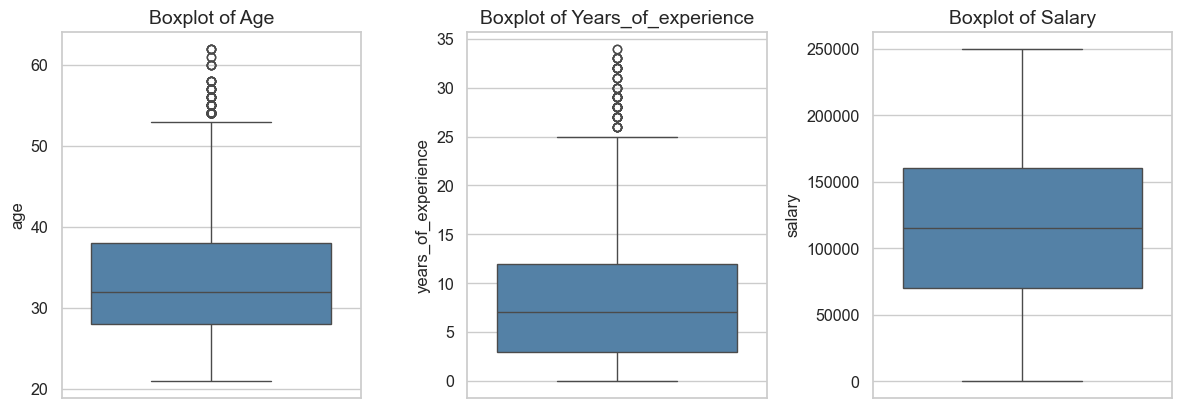

In [23]:
# Visualize distributions with boxplots
plt.figure(figsize=(min(16, 4*len(numerical_cols)), 4*len(numerical_cols)))
for i, col in enumerate(numerical_cols, 1):
    # Capitalize column names for display
    col_display = str.capitalize(col)
    plt.subplot(len(numerical_cols), 3, i)
    sns.boxplot(y=current_df[col], color='steelblue')
    plt.title(f'Boxplot of {col_display}')
plt.tight_layout()
plt.show()

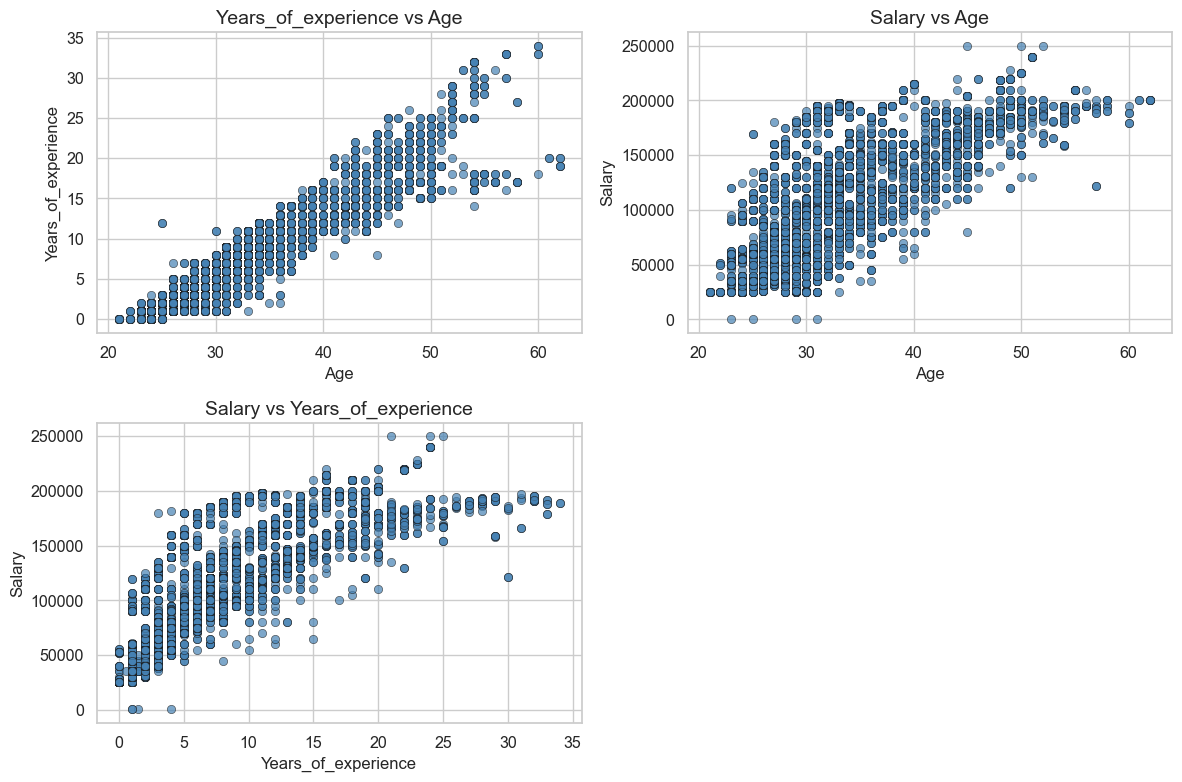

In [24]:
# Generate all unique pairs of numerical columns
pairs = list(itertools.combinations(numerical_cols, 2))

# Determine grid layout automatically
cols = 2
rows = int(np.ceil(len(pairs) / cols))

plt.figure(figsize=(12, 4 * rows))

for i, (x_col, y_col) in enumerate(pairs, 1):
    # Capitalize column names for display
    x_display = str.capitalize(x_col)
    y_display = str.capitalize(y_col)
    plt.subplot(rows, cols, i)
    sns.scatterplot(data=current_df, x=x_col, y=y_col, color='steelblue', edgecolor='k', alpha=0.7)
    plt.title(f'{y_display} vs {x_display}')
    plt.xlabel(x_display)
    plt.ylabel(y_display)

plt.tight_layout()
plt.show()

## Export Data

In [25]:
# Overwrite original dataframe with current dataframe
salary_df = current_df.copy()
print("✅ Overwrote 'salary_df' with current dataframe.")

# Export Data
current_df.to_csv('salary_data_cleaned.csv', index=False)


✅ Overwrote 'salary_df' with current dataframe.
